In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ad_conversion.csv to ad_conversion.csv
Saving churn.csv to churn.csv
Saving fish.csv to fish.csv
Saving sp500_yearly_returns.csv to sp500_yearly_returns.csv
Saving taiwan_real_estate2.csv to taiwan_real_estate2.csv


In [3]:
ad_conversion = pd.read_csv('ad_conversion.csv')
ad_conversion

,spent_usd,n_impressions,n_clicks
0,1.430000,7350,1
1,1.820000,17861,2
2,1.250000,4259,1
3,1.290000,4133,1
4,4.770000,15615,3
...,...,...,...
931,358.189997,1129773,252
932,173.880003,637549,120
933,40.289999,151531,28
934,198.710000,790253,135


1. Create mdl_click_vs_impression_orig models n_clicks versus n_impressions
2. Print the summary of mdl_click_vs_impression_orig.

In [7]:
mdl_click_vs_impression_orig = ols("n_clicks ~ n_impressions", data=ad_conversion, ci=None).fit()

# Print a summary of mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.summary())

                            OLS Regression Results                            
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Sun, 31 Oct 2021   Prob (F-statistic):               0.00
Time:                        01:12:34   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residuals:                     934   BIC:                             8267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6829      0.789      2.133

1. Create mdl_click_vs_impression_trans models qdrt_n_clicks versus qdrt_n_impressions is the transformed model you did in exercise before
2. Print the summary of mdl_click_vs_impression_orig.

In [8]:
# From previous steps
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25

mdl_click_vs_impression_trans = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion, ci=None).fit()

# Print a summary of mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.summary())

                            OLS Regression Results                            
Dep. Variable:          qdrt_n_clicks   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.590e+04
Date:                Sun, 31 Oct 2021   Prob (F-statistic):               0.00
Time:                        01:24:52   Log-Likelihood:                 193.90
No. Observations:                 936   AIC:                            -383.8
Df Residuals:                     934   BIC:                            -374.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0717      0

1. Print the coefficient of determination for mdl_click_vs_impression_orig.
2. Do the same for mdl_click_vs_impression_trans.

**HINT!**

Use the .rsquared attribute of both models.


In [9]:
# Print the coeff of determination for mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.rsquared)

# Print the coeff of determination for mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.rsquared)

0.8916134973508041
0.9445272817143905


## Residual standard error

1. Calculate the MSE of mdl_click_vs_impression_orig, assigning to mse_orig.
2. Using mse_orig, calculate and print the RSE of mdl_click_vs_impression_orig.
3. Do the same for mdl_click_vs_impression_trans.

**Hint!**

You can retrieve the MSE from the .mse_resid attribute.
Take the square root of the MSE to get the RSE using np.sqrt().


In [10]:
# Calculate mse_orig for mdl_click_vs_impression_orig
mse_orig = mdl_click_vs_impression_orig.mse_resid

# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)

# Calculate mse_trans for mdl_click_vs_impression_trans
mse_trans = mdl_click_vs_impression_trans.mse_resid

# Calculate rse_trans for mdl_click_vs_impression_trans and print it
rse_trans = np.sqrt(mse_trans)
print("RSE of transformed model: ", rse_trans)

RSE of original model:  19.905838862478138
RSE of transformed model:  0.19690640896875722


## Drawing diagnostic plots

1. Create the residuals versus fitted values plot. Add a lowess argument to visualize the trend of the residuals.
2. Import qqplot() from statsmodels.api.
3. Create the Q-Q plot of the residuals.


In [14]:
taiwan_real_estate = pd.read_csv('taiwan_real_estate2.csv')
taiwan_real_estate

# Create the model object
mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

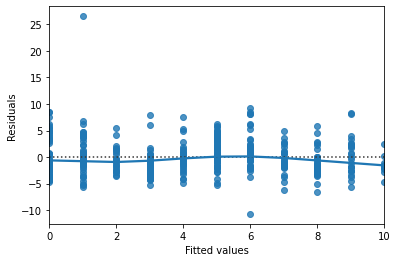

In [12]:
# Plot the residuals vs. fitted values
sns.residplot(x="n_convenience", y="price_twd_msq", data=taiwan_real_estate, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

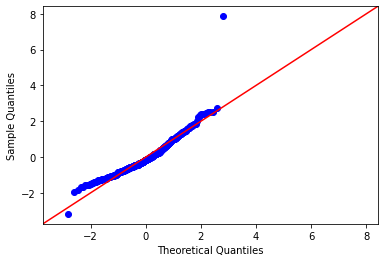

In [15]:
# Import qqplot
from statsmodels.api import qqplot

# Create the Q-Q plot of the residuals
qqplot(data=mdl_price_vs_conv.resid, fit=True, line="45")

# Show the plot
plt.show()

Create the scale-location plot.

**HINT!**

With regplot(), you can draw a scale-location plot by setting the fitted values of the model as the x argument and the standardized residuals as the y argument.

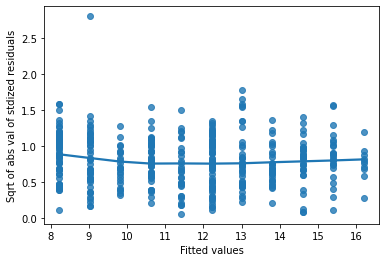

In [16]:
# Preprocessing steps
model_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(x=mdl_price_vs_conv.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()